In [1]:
# Load library
import requests
import pandas as pd
import tensorflow as tf
import tensorflow_text as tf_text
from matplotlib import pyplot as plt

# Load constants
DATA_PATH = "data/twitter_sentiment"

# Checking Data

For initial data checking, you can take a look to the raw data itself.

In [2]:
df_train = pd.read_csv(f"{DATA_PATH}/twitter_training.csv", names=["unk_number", "game", "sentiment", "tweet"])
df_train

,unk_number,game,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
df_val = pd.read_csv(f"{DATA_PATH}/twitter_validation.csv", names=["unk_number", "game", "sentiment", "tweet"])
df_val

,unk_number,game,sentiment,tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


We're going to focus on sentiment and the tweet. And also we're going to drop nan value

In [4]:
df_train = df_train[["tweet", "sentiment"]]
df_train = df_train.dropna()

In [5]:
df_val = df_val[["tweet", "sentiment"]]
df_val

,tweet,sentiment
0,I mentioned on Facebook that I was struggling ...,Irrelevant
1,BBC News - Amazon boss Jeff Bezos rejects clai...,Neutral
2,@Microsoft Why do I pay for WORD when it funct...,Negative
3,"CSGO matchmaking is so full of closet hacking,...",Negative
4,Now the President is slapping Americans in the...,Neutral
...,...,...
995,⭐️ Toronto is the arts and culture capital of ...,Irrelevant
996,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,Irrelevant
997,Today sucked so it’s time to drink wine n play...,Positive
998,Bought a fraction of Microsoft today. Small wins.,Positive


We're going to look what type of "sentiment" we're going to predict

In [6]:
df_train["sentiment"].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

There are 4 type of "sentiment" we're going to predict based on tweet

# Model creation

Sekarang kita coba membuat model sendiri!. Kita akan memanfaatkan model sederhana terlebih dahulu.  
Pada dasarnya, model machine learning hanyalah model matematika. Sehingga model tidak mengerti teks.
Kita membutuhkan alat yang bisa merubah teks menjadi angka. Kita namakan ini Tokenizer.
  
Kalau pada model sebelumnya kita dapat langsung memasukana teks, itu karena tokenizernya sudah masuk ke dalam model tersebut

## Tokenizer Creation (Advance) using Subword Tokenizer

Kita akan menggunakan representasi angka yang pernah di buat orang. Representasi ini dibangun dari dataset Bahasa Inggris.

In [7]:
url = "https://github.com/tensorflow/text/blob/master/tensorflow_text/python/ops/test_data/test_oss_model.model?raw=true"
sp_model = requests.get(url).content
tokenizer = tf_text.SentencepieceTokenizer(sp_model, out_type=tf.int32)
tokens = tokenizer.tokenize(["What you know you can't explain, but you feel it."])
print(tokens.to_list())

[[338, 49, 208, 49, 162, 32, 15, 801, 5, 52, 49, 650, 27, 6]]


In [8]:
# Test it on our data
text_dummy = df_val['tweet'][:2].to_list()
tokens = tokenizer.tokenize(text_dummy)
tokens.to_tensor()

<tf.Tensor: shape=(2, 99), dtype=int32, numpy=
array([[  9,  33,  24, 294,  12,  59, 280,  19, 135,  66, 514,  36,   9,
         22, 460,  53,  37,  37, 343,  42, 264,  15,  25,  87, 149,  10,
        121,  42,  11, 626,   7, 173, 313,   5, 141, 257, 153, 424,  24,
          8, 180, 228,  75, 479,  26,   0,   8, 584,  11, 160,  15,  25,
         16,  50,   4,   0, 165,  19,  34,  82,  34, 162,   0,  15, 138,
         99,  14,  38,  17,   0,  13, 271,  10,  72, 347, 253,  26,  19,
          5, 118, 333, 263,   8,   9,   0,  26,  11,   4, 180, 997,  34,
          5,   4, 190,  83, 392, 410,   4,   0],
       [296, 540, 381,   4, 199,  16,  63,   8,   4,  35, 104,  26,  19,
        997, 112, 249,   8,   8,   4, 336,  16,  57,  57, 296,  16, 997,
         21,   8,  70, 999,  16,  28,  15,   8,   4, 946,   8, 393,  84,
         34, 646,  12, 110,  11,   4,  32,  17,  30,  53,  37,  86,  73,
         40,  32,  80,  66,  28,   6,  28,  21,   6,  53,  46,   0, 136,
         63,   8,   0,  19, 

In [9]:
tokenizer.id_to_string([0])

<tf.Tensor: shape=(1,), dtype=string, numpy=array([b'<unk>'], dtype=object)>

In [10]:
text_dummy = df_val['tweet'][:10].to_list()
tokens = tokenizer.tokenize(text_dummy)
tokens.to_tensor()

<tf.Tensor: shape=(10, 121), dtype=int32, numpy=
array([[  9,  33,  24, ...,   0,   0,   0],
       [296, 540, 381, ...,   0,   0,   0],
       [  4,   0, 431, ...,   0,   0,   0],
       ...,
       [  4, 204, 797, ...,   0,   0,   0],
       [ 45,  50,   8, ...,   0,   0,   0],
       [280, 100,   0, ...,  57, 556,   0]])>

terlihat bahwa shapenya berbeda jika menggunakan data yang lebih banyak.  
Yang pertama memiliki shape (2, 99) dan yang kedua (10, 121).  
Untuk nilai 2 dan 10 terlihat bahwa itu adalah jumlah teks yang dimasukkan.  
Tetapi hasil tokenisasinya memiliki panjang yang berbeda. Ini tidak baik, kita harus menyamakan dengan menggunakan padding

In [11]:
# Padding
padded_tokens, _ = tf_text.pad_model_inputs(tokens, max_seq_length=256)
padded_tokens

<tf.Tensor: shape=(10, 256), dtype=int32, numpy=
array([[  9,  33,  24, ...,   0,   0,   0],
       [296, 540, 381, ...,   0,   0,   0],
       [  4,   0, 431, ...,   0,   0,   0],
       ...,
       [  4, 204, 797, ...,   0,   0,   0],
       [ 45,  50,   8, ...,   0,   0,   0],
       [280, 100,   0, ...,   0,   0,   0]])>

Kita buat tahap pemrosesan ini menjadi layer, sehingga bisa disatukan menjadi 1 model tensorflow

In [12]:
class MyPreprocessingLayer(tf.keras.layers.Layer):
    def __init__(self, max_length, **kwargs):
        # Config
        self.max_length = max_length

        # Load Tokenizer
        url = "https://github.com/tensorflow/text/blob/master/tensorflow_text/python/ops/test_data/test_oss_model.model?raw=true"
        sp_model = requests.get(url).content
        self.tokenizer = tf_text.SentencepieceTokenizer(sp_model,
                                                        out_type=tf.int32)

        super(MyPreprocessingLayer, self).__init__(**kwargs)

    def call(self, inputs):
        tokens = self.tokenizer.tokenize(inputs)
        padded_tokens, _ = tf_text.pad_model_inputs(tokens,
                                                    max_seq_length=self.max_length)
        return padded_tokens

    def get_config(self):
        config = super().get_config()
        config.update({
            "max_length": self.max_length,
        })
        return config

In [13]:
preprocess = MyPreprocessingLayer(256)
tokens = preprocess(["hello twitter!, we're currently using TensorFlow Custom Layer"])

## Embedding

Dari token yang dimiliki, kita ingin  setiap token memiliki "nilai" untuk dipelajari.  

In [14]:
tokenizer.vocab_size()

<tf.Tensor: shape=(), dtype=int32, numpy=1000>

 Pada setiap token yang dimiliki (1000 macam token), menggunakan Embedding kita bisa buat menjadi 256 representasi angka

In [15]:
embedding = tf.keras.layers.Embedding(tokenizer.vocab_size(), 512)

In [16]:
logits = embedding(tokens)
logits

<tf.Tensor: shape=(1, 256, 512), dtype=float32, numpy=
array([[[-0.01445819, -0.01471406, -0.03019445, ..., -0.03871783,
          0.01214311, -0.02938374],
        [-0.03245527,  0.03770615,  0.01286599, ..., -0.00782065,
         -0.00088071,  0.02137181],
        [-0.02183676,  0.01546753,  0.04530854, ...,  0.04917002,
          0.01177835, -0.03267802],
        ...,
        [-0.00210208,  0.00775175, -0.04681323, ..., -0.02620925,
         -0.0398742 ,  0.04425505],
        [-0.00210208,  0.00775175, -0.04681323, ..., -0.02620925,
         -0.0398742 ,  0.04425505],
        [-0.00210208,  0.00775175, -0.04681323, ..., -0.02620925,
         -0.0398742 ,  0.04425505]]], dtype=float32)>

## Modelling

Dari nilai yang dimiliki, ini sudah mirip dengan nilai embed yang kita punya

In [17]:
embed = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(), dtype="string"),
    MyPreprocessingLayer(256),
    tf.keras.layers.Embedding(1000, 512)
])

In [18]:
embed.predict(["hello world!"])

1/1 [==============================] - 0s 82ms/step


array([[[-0.00486523,  0.02886779, -0.04827676, ...,  0.03566139,
          0.02338752,  0.04550095],
        [ 0.03095976,  0.01297424, -0.02639601, ..., -0.04415597,
         -0.02591897,  0.03411342],
        [-0.0305589 , -0.00647451,  0.02612315, ...,  0.03946436,
          0.04353999,  0.03334612],
        ...,
        [ 0.02974537, -0.01042597,  0.02931045, ...,  0.00990592,
          0.01834259, -0.03701882],
        [ 0.02974537, -0.01042597,  0.02931045, ...,  0.00990592,
          0.01834259, -0.03701882],
        [ 0.02974537, -0.01042597,  0.02931045, ...,  0.00990592,
          0.01834259, -0.03701882]]], dtype=float32)

Sudah mirip bukan? Mirip dengan melakukan fine-tune. Kita merubah dari text menjadi angka.  
Selanjutnya kita akan membuat modelnya.

In [19]:
model = tf.keras.models.Sequential([
    embed,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4)
])

In [20]:
model.predict(["hello world!"])

1/1 [==============================] - 0s 99ms/step


array([[ 0.0148985 , -0.03157995, -0.0219036 , -0.00824872]],
      dtype=float32)

# Feature Engineering

Berarti yang kita masukan ke dalam model adalah  
text -> angka  
  
Maslahnya sentimen kita pada csv masih dalam bentuk tulisan. Sebelum dimasukkan ke model, kita harus mengubahnya menjadi angka

In [21]:
df_train['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [22]:
sentiment_dictionary = {
    "Positive": 0,
    "Neutral": 1,
    "Negative": 2,
    "Irrelevant": 3
}

In [23]:
df_train_model = df_train.copy()
df_train_model['sentiment'] = df_train['sentiment'].map(lambda x : sentiment_dictionary[x])
df_train_model

,tweet,sentiment
0,im getting on borderlands and i will murder yo...,0
1,I am coming to the borders and I will kill you...,0
2,im getting on borderlands and i will kill you ...,0
3,im coming on borderlands and i will murder you...,0
4,im getting on borderlands 2 and i will murder ...,0
...,...,...
74677,Just realized that the Windows partition of my...,0
74678,Just realized that my Mac window partition is ...,0
74679,Just realized the windows partition of my Mac ...,0
74680,Just realized between the windows partition of...,0


In [24]:
df_val_model = df_val.copy()
df_val_model['sentiment'] = df_val['sentiment'].map(lambda x : sentiment_dictionary[x])
df_val_model

,tweet,sentiment
0,I mentioned on Facebook that I was struggling ...,3
1,BBC News - Amazon boss Jeff Bezos rejects clai...,1
2,@Microsoft Why do I pay for WORD when it funct...,2
3,"CSGO matchmaking is so full of closet hacking,...",2
4,Now the President is slapping Americans in the...,1
...,...,...
995,⭐️ Toronto is the arts and culture capital of ...,3
996,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,3
997,Today sucked so it’s time to drink wine n play...,0
998,Bought a fraction of Microsoft today. Small wins.,0


# Model Training

Nah data yang dipunya sudah sesuai dengan yang model bisa mengerti. Sekarang tinggal di train dengan loss yang disesuaikan dengan kebutuhan

In [25]:
# Hati2 untuk nilai loss, harus disesuaikan dengan data yang dipunya.
# Kita memiliki 4 output dari model yang dibandingkan dengan 1 nilai pada dataset
# Untuk klasifikasi

# Hal yang tepat ialah menggunakan
# https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-function
# TODO: Ajari baca dokumentasi loss function keras
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
result = model.fit(
          epochs=5,
          x=df_train_model['tweet'].values,
          y=df_train_model['sentiment'].values,
          batch_size=32,
          validation_data=(df_val_model['tweet'].values, 
                           df_val_model['sentiment'].values)
)

Epoch 1/5
2313/2313 [==============================] - 36s 15ms/step - loss: 1.1007 - accuracy: 0.5422 - val_loss: 0.6761 - val_accuracy: 0.7500
Epoch 2/5
2313/2313 [==============================] - 35s 15ms/step - loss: 0.7740 - accuracy: 0.7029 - val_loss: 0.6016 - val_accuracy: 0.7970
Epoch 3/5
2313/2313 [==============================] - 34s 15ms/step - loss: 0.6094 - accuracy: 0.7724 - val_loss: 0.5271 - val_accuracy: 0.8430
Epoch 4/5
2313/2313 [==============================] - 34s 15ms/step - loss: 0.5097 - accuracy: 0.8113 - val_loss: 0.5476 - val_accuracy: 0.8380
Epoch 5/5
2313/2313 [==============================] - 35s 15ms/step - loss: 0.4502 - accuracy: 0.8368 - val_loss: 0.5861 - val_accuracy: 0.8450


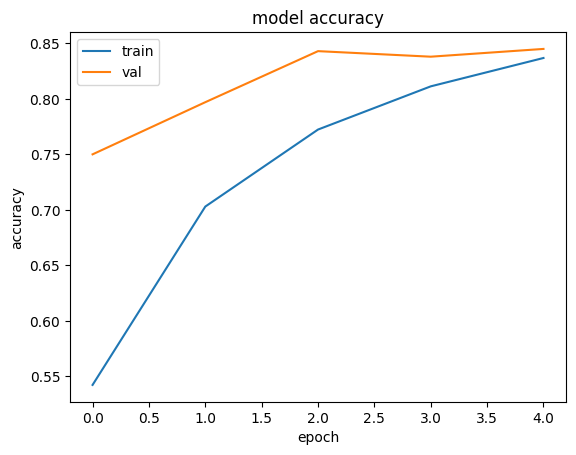

In [27]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

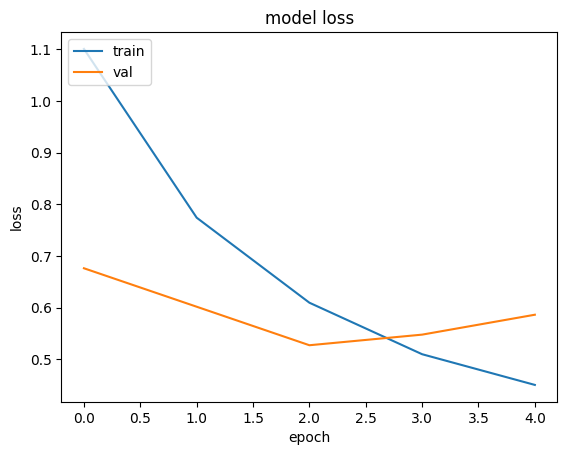

In [28]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Saving Model

In [29]:
model.save("from_zero_model.h5", save_traces=False)

# Loading Model

In [30]:
loaded_model = tf.keras.models.load_model(
    filepath="from_zero_model.h5",
    custom_objects={
        "MyPreprocessingLayer": MyPreprocessingLayer
    }
)

In [32]:
loaded_model.predict(["You'are really bad!"])

1/1 [==============================] - 0s 31ms/step


array([[-0.7895155 , -1.061159  ,  2.0803802 , -0.47428125]],
      dtype=float32)